# Tarea 2

**Instrucciones**: Resuelve correctamente lo que se te pide

Realiza un programa que incluya cada una de las siguientes actividades.

## Operaciones con filtros

Dada la imagen en escala de grises que se indica en cada ejercicio, diseñar un algoritmo para cada tipo de filtro mostrando en el código fuente los cálculos implicados y la secuencia de barrido utilizada para mover la máscara en la imagen. Además, muestre la imagen original y las tres imágenes filtradas para cada uno de los casos. Interpretar resultados.


In [2]:
from PIL import Image, ImageOps
import requests
from io import BytesIO
import numpy as np

response = requests.get(
    r'https://raw.githubusercontent.com/LeonelYLuego/University-Works/main/Procesamiento%20de%20Im%C3%A1genes/Im%C3%A1genes/80.png')
color_img = Image.open(BytesIO(response.content), mode='r')
gray_image = ImageOps.grayscale(color_img)
img = np.asarray(gray_image)


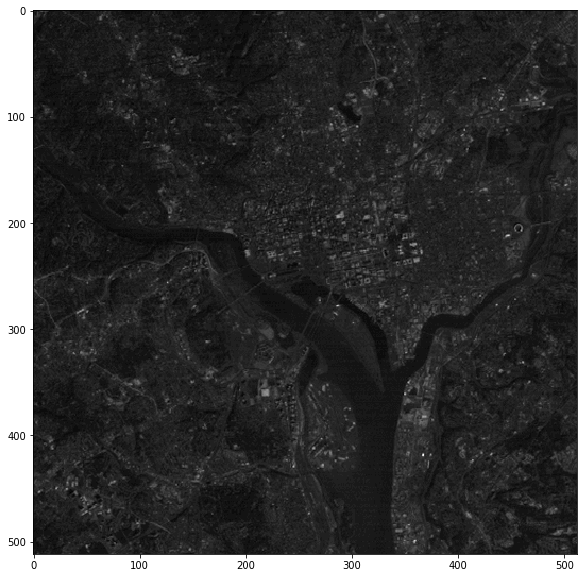

In [3]:
import matplotlib.pyplot as plt

def print_img(img):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img, interpolation='nearest', cmap='gray')


print_img(img)


### Filtro Espacial


In [4]:
import cv2

origin = np.array([[1, 2, 3, 4, 5],
                   [7, 8, 7, 4, 1],
                   [6, 1, 9, 5, 2],
                   [4, 7, 1, 4, 7],
                   [5, 8, 3, 7, 0]], np.uint8)

mask = np.ones((5, 5))


def correlation(origin, mask, border='zeros', verbose=False):
    a = int((mask.shape[0] - 1) / 2)
    b = int((mask.shape[1] - 1) / 2)
    extended = np.zeros((origin.shape[0] + a * 2, origin.shape[1] + a * 2))
    M, N = extended.shape
    for y in range(0 + a, M - a):
        for x in range(0 + b, N - b):
            extended[y, x] = origin[y - a, x - b]
    if border == 'symmetric':
        extended = cv2.copyMakeBorder(origin, a, a, b, b, cv2.BORDER_REFLECT)
    if border == 'replicate':
        extended = cv2.copyMakeBorder(origin, a, a, b, b, cv2.BORDER_REPLICATE)
    if border == 'extension':
        extended = cv2.copyMakeBorder(origin, a, a, b, b, cv2.BORDER_WRAP)
    if (verbose):
        print(extended)
    result = np.zeros(extended.shape)
    for y in range(0 + a, M - a):
        for x in range(0 + b, N - b):
            sum = 0
            for s in range(-a, a + 1):
                for t in range(-b, b + 1):
                    sum += mask[s + a, t + b] * extended[y + s, x + t]
            result[y, x] = sum
    response = np.zeros(origin.shape)
    for y in range(0 + a, M - a):
        for x in range(0 + b, N - b):
            if (result[y, x] > 255):
                response[y - a, x - b] = 255
            elif (result[y, x] < 0):
                response[y - a, x - b] = 0
            else:
                response[y - a, x - b] = result[y, x]
    return response


print('Imagen extendida: ')
result = correlation(origin, mask, 'zeros', True)

print('\nResultado después del filtro espacial:')
print(result)


Imagen extendida: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 2. 3. 4. 5. 0. 0.]
 [0. 0. 7. 8. 7. 4. 1. 0. 0.]
 [0. 0. 6. 1. 9. 5. 2. 0. 0.]
 [0. 0. 4. 7. 1. 4. 7. 0. 0.]
 [0. 0. 5. 8. 3. 7. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Resultado después del filtro espacial:
[[ 44.  57.  65.  51.  40.]
 [ 56.  73.  88.  70.  52.]
 [ 72.  96. 111.  88.  62.]
 [ 66.  86.  96.  74.  50.]
 [ 44.  60.  69.  54.  38.]]


## Filtro Promedio

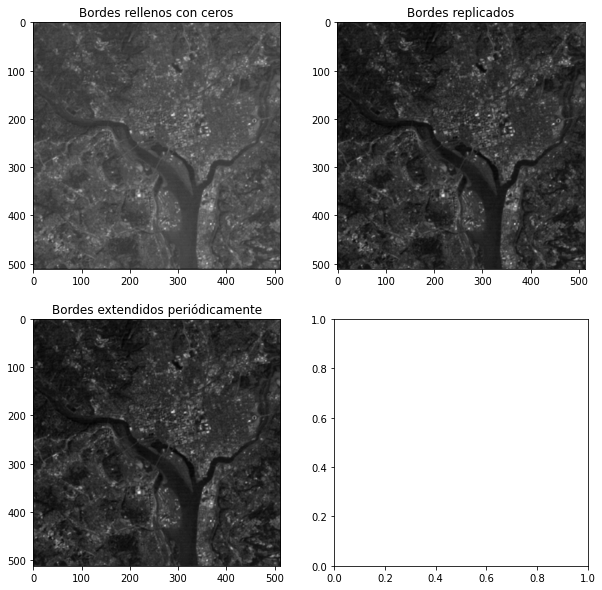

In [17]:
def mean_filter(origin, size = 3):
    mask = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            mask[i, j] = 1/(size ** 2)
    img1 = correlation(origin, mask, 'zeros')
    img2 = correlation(origin, mask, 'replicate')
    img3 = correlation(origin, mask, 'extension')
    f, axarr = plt.subplots(2,2, figsize=(10, 10))
    axarr[0,0].set_title('Bordes rellenos con ceros')
    axarr[0,0].imshow(img1, cmap='gray')
    axarr[0,1].set_title('Bordes replicados')
    axarr[0,1].imshow(img2, cmap='gray')
    axarr[1,0].set_title('Bordes extendidos periódicamente')
    axarr[1,0].imshow(img3, cmap='gray')
    plt.show()

mean_filter(img)

## Filtro Gaussiano

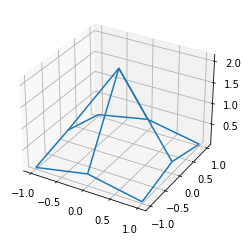

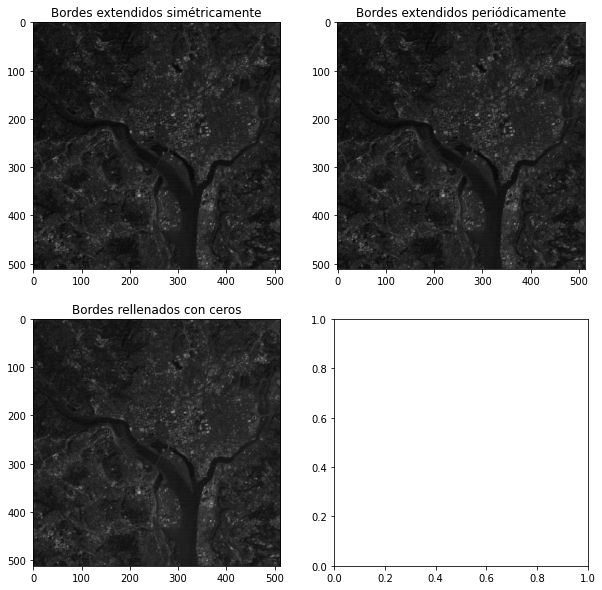

In [13]:
import math

def gauss_filter(origin, size = 3, sigma = 1):
    N = size

    a = int((N - 1) / 2)

    mask = np.zeros((N, N))

    for m in range(-a, a + 1):
        for n in range(-a, a + 1):
            K = 0
            for s in range(int(-(N-1)/2), int(((N - 1)/2) + 1)):
                sum = 0
                for t in range(int(-(N-1/2)), int(((N - 1)/2) + 1)):
                    sum += math.exp((s ** 2 + t ** 2)/(2 * sigma ** 2))
                K += sum
            mask[m + a, n +
                a] = (math.exp(- ((m ** 2 + n ** 2) / (2 * sigma ** 2))))/K

    x, y = np.arange(-a, a + 1, 1), np.arange(-a, a + 1, 1)
    x, y = np.meshgrid(x, y)

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_wireframe(x, y, mask)
    plt.show()

    img1 = correlation(origin, mask, 'replicate')
    img2 = correlation(origin, mask, 'extension')
    img3 = correlation(origin, mask, 'zeros')
    f, axarr = plt.subplots(2,2, figsize=(10, 10))
    axarr[0,0].set_title('Bordes extendidos simétricamente')
    axarr[0,0].imshow(img1, cmap='gray')
    axarr[0,1].set_title('Bordes extendidos periódicamente')
    axarr[0,1].imshow(img2, cmap='gray')
    axarr[1,0].set_title('Bordes rellenados con ceros')
    axarr[1,0].imshow(img3, cmap='gray')
    plt.show()

gauss_filter(img, 3, 0.5)

## Filtros Laplacianos

$$
h(m,n) = \left[ \begin{array}{cc} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{array} \right]
$$

### Bordes Replicados


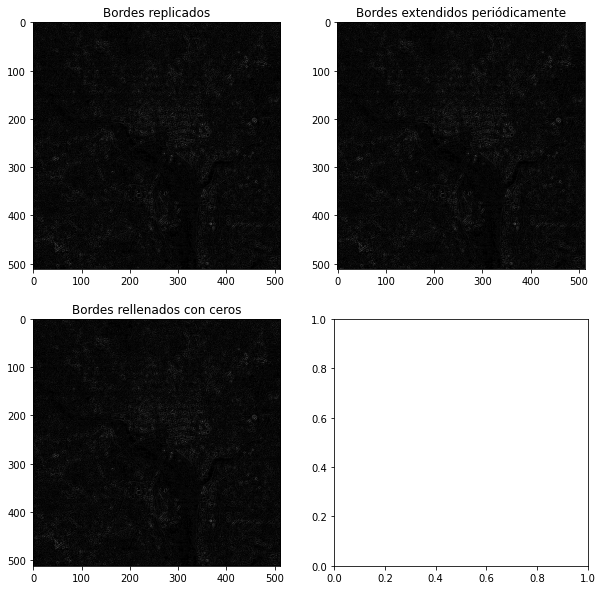

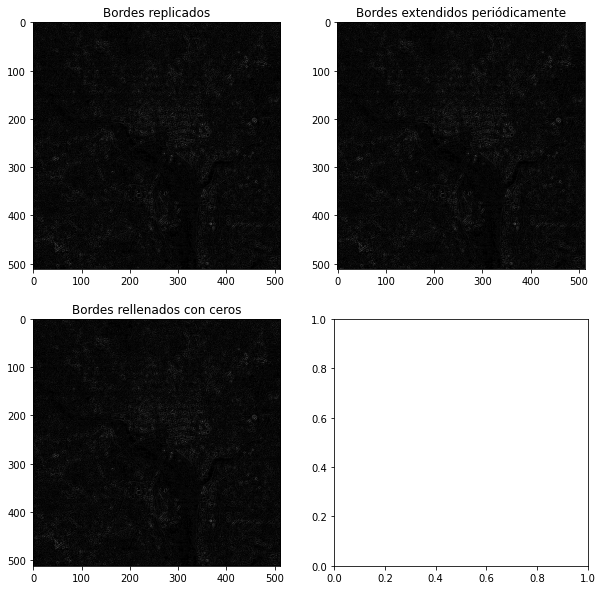

In [15]:
def lap_filter(origin, mask_select=1):
    if(mask_select == 1):
        mask = np.array([[0, 1, 0],
                 [1, -4, 1],
                 [0, 1, 0]])
    elif(mask_select == 2):
        mask = np.array([[0, 1, 0],
                 [1, -4, 1],
                 [0, 1, 0]])
    img1 = correlation(origin, mask, 'replicate')
    img2 = correlation(origin, mask, 'extension')
    img3 = correlation(origin, mask, 'zeros')
    f, axarr = plt.subplots(2,2, figsize=(10, 10))
    axarr[0,0].set_title('Bordes replicados')
    axarr[0,0].imshow(img1, cmap='gray')
    axarr[0,1].set_title('Bordes extendidos periódicamente')
    axarr[0,1].imshow(img2, cmap='gray')
    axarr[1,0].set_title('Bordes rellenados con ceros')
    axarr[1,0].imshow(img3, cmap='gray')
    plt.show()

lap_filter(img, 1)
lap_filter(img, 2)

1. Aplicar a alguna de las imágenes .png de la carpeta, el filtro promedio con los tamaños de la máscara 5, 9, 15 y 35. Mostrar la imagen original y las 5 imágenes resultantes e interpretar resultados.

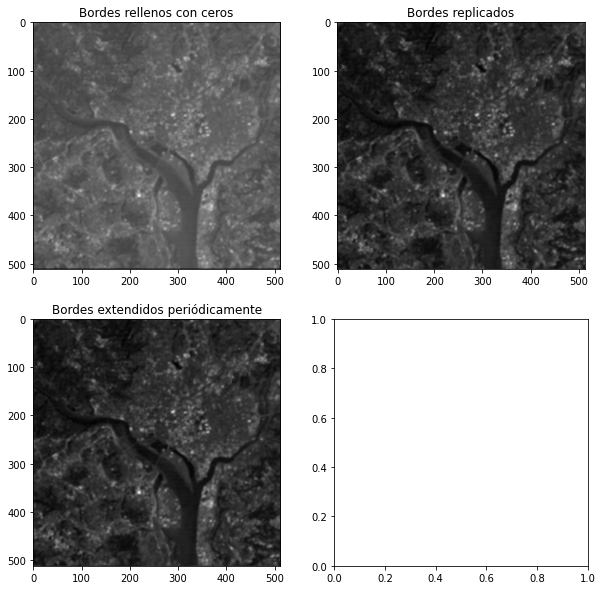

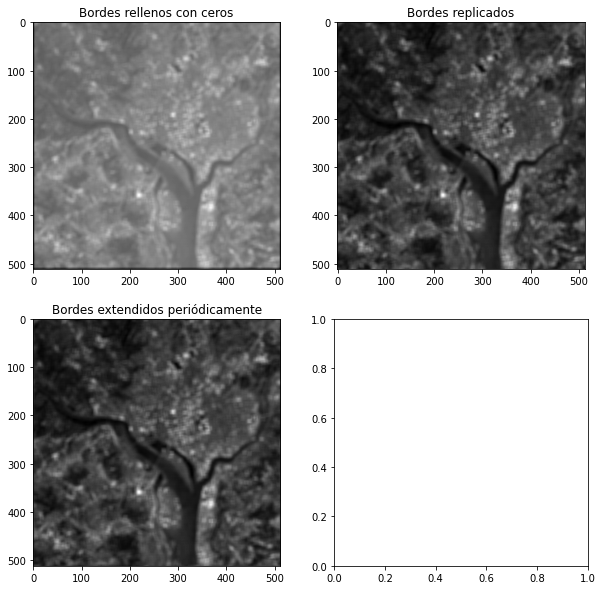

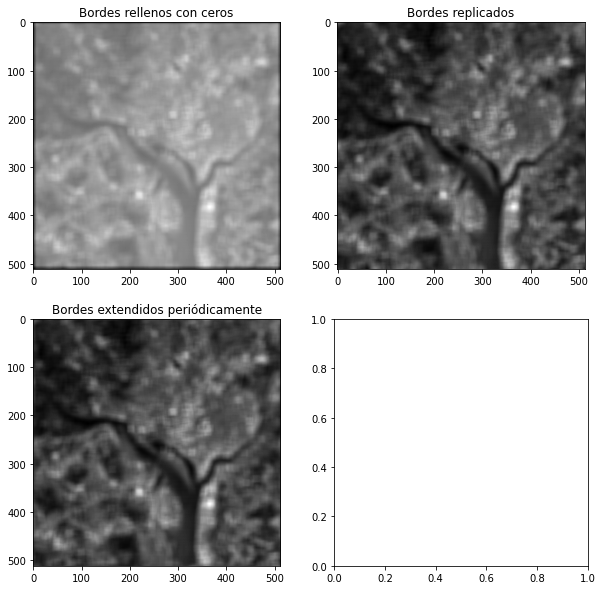

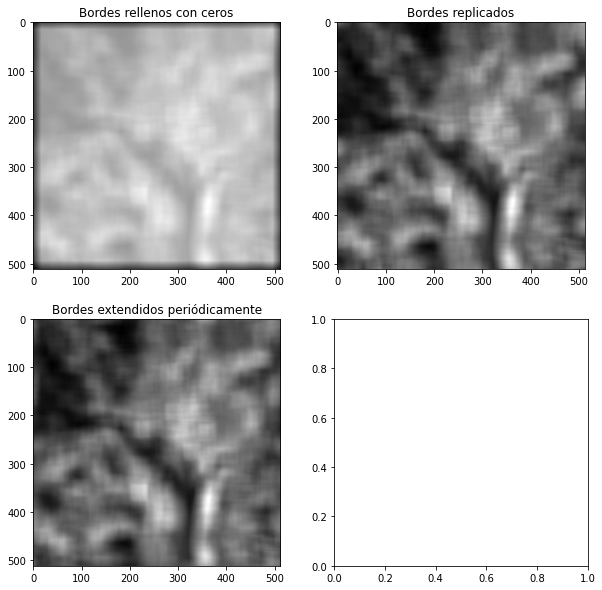

In [18]:
mean_filter(img, 5)
mean_filter(img, 9)
mean_filter(img, 15)
mean_filter(img, 35)

> Mientras el filtro es de mayor tamaño, la imagen pierde calidad y se vuelve más suavizada, pero se puede observar que los bordes que existen en la imagen cada vez están más difuminados.

2. Aplicar a la imagen 79.png, el filtro promedio con un tamaño de mascara de 9 x 9, y
enseguida aplicar el umbral de escalón. Muestre la imagen original y las dos resultantes.

In [19]:
response = requests.get(
    r'https://raw.githubusercontent.com/LeonelYLuego/University-Works/main/Procesamiento%20de%20Im%C3%A1genes/Im%C3%A1genes/79.png')
color_img = Image.open(BytesIO(response.content), mode='r')
gray_image = ImageOps.grayscale(color_img)
img = np.asarray(gray_image)

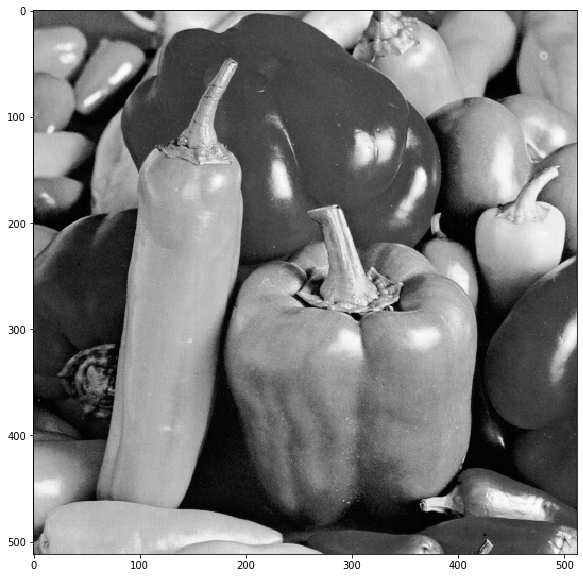

In [22]:
print_img(img)

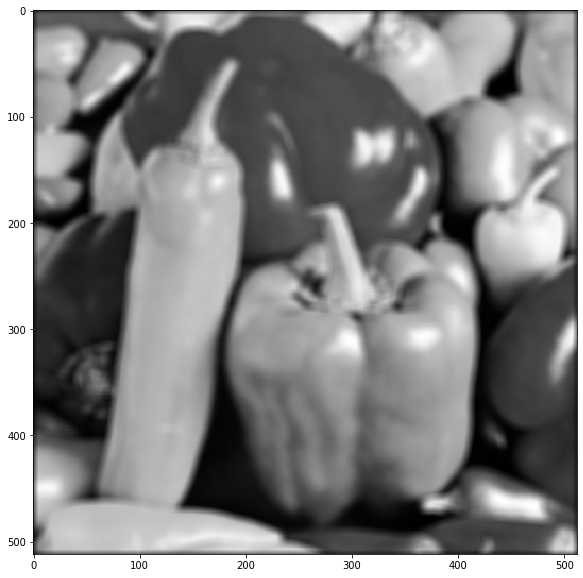

In [25]:
size = 9
mask = np.zeros((size, size))
for i in range(size):
    for j in range(size):
        mask[i, j] = 1/(size ** 2)

result = correlation(img, mask)
print_img(result)

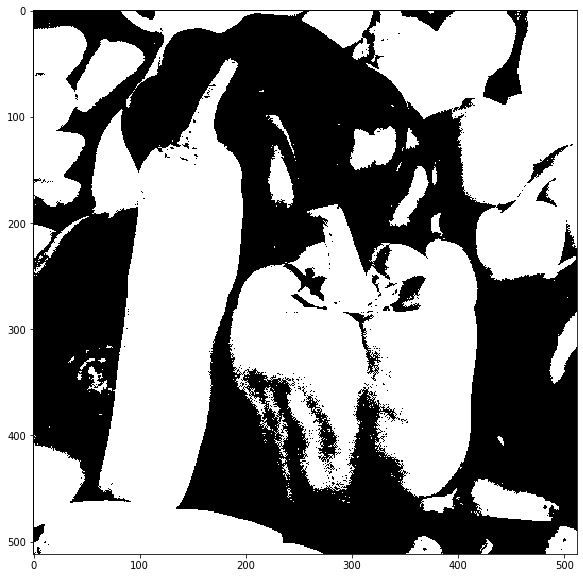

In [31]:
# Umbral Escalon
ret, thr = cv2.threshold(img, 100, 255, type=cv2.THRESH_BINARY)
print_img(thr)

> Al aplicar el filtro de mediana a la imagen, está se difuminó y perdió calidad, y en la imagen con un umbral escalon se puede observar que los bordes no están tan definidos como en la imagen original.

3. Aplicar a alguna de las imágenes .png de la carpeta, ruido sal y pimienta, aplicar el filtro promedio con un tamaño de mascara de 3 x 3 y el filtro de mediana con un tamaño de mascara de 3 x 3. Muestre las 3 imágenes resultantes e interprete resultados.

In [32]:
response = requests.get(
    r'https://raw.githubusercontent.com/LeonelYLuego/University-Works/main/Procesamiento%20de%20Im%C3%A1genes/Im%C3%A1genes/71.png')
color_img = Image.open(BytesIO(response.content), mode='r')
gray_image = ImageOps.grayscale(color_img)
img = np.asarray(gray_image)

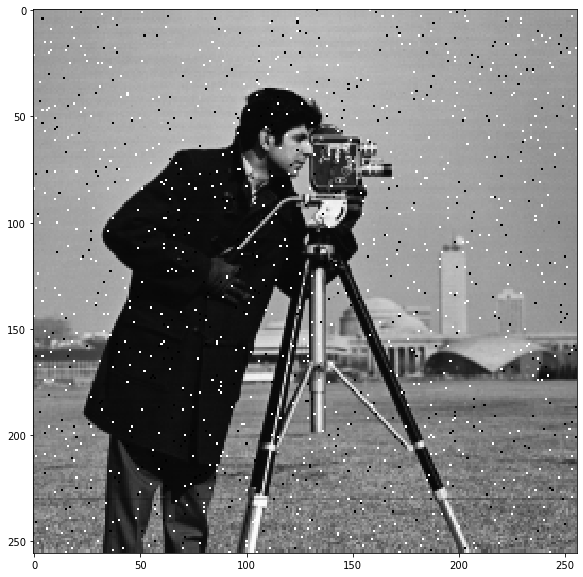

In [39]:
import random

def add_noise(img):
    row, col = img.shape
    number_of_pixels = random.randint(300, 1000)
    for i in range(number_of_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, col - 1)
        img[y_coord, x_coord] = 255

    number_of_pixels = random.randint(300, 1000)
    for i in range(number_of_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, col - 1)
        img[y_coord, x_coord] = 0

    return img

noise_img = add_noise(np.array(img))
print_img(noise_img)

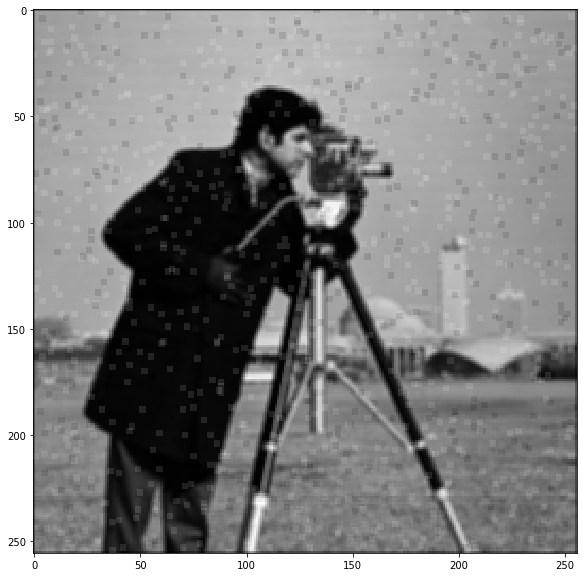

In [41]:
size = 3
mask = np.zeros((size, size))
for i in range(size):
    for j in range(size):
        mask[i, j] = 1/(size ** 2)

result = correlation(noise_img, mask)
print_img(result)

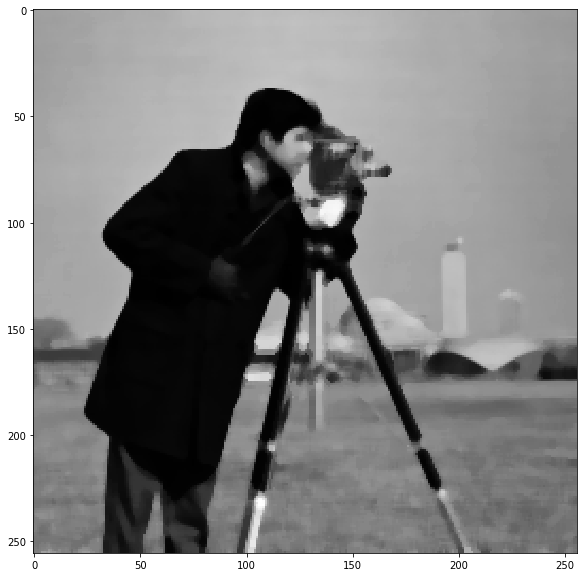

In [42]:
result = cv2.medianBlur(img,5)
print_img(result)

> Se puede observar que el ruido al aplicar el filtro de media se reduce sin llegar a desaparecer y no existe una gran pérdida en la calidad de la imagen, mientras que con el filtro de mediana de 5x5 se puede observar que desaparece todo el ruido de sal y pimienta, pero perdió más definición.

4. ¿Cómo se vería la imagen 02.png después de la aplicación de

a) ¿Un filtro de 3 x 3 de media aritmética?

b) ¿Un filtro de 7 x 7 de media aritmética?

c) ¿Un filtro de 9 x 9 de media aritmética?

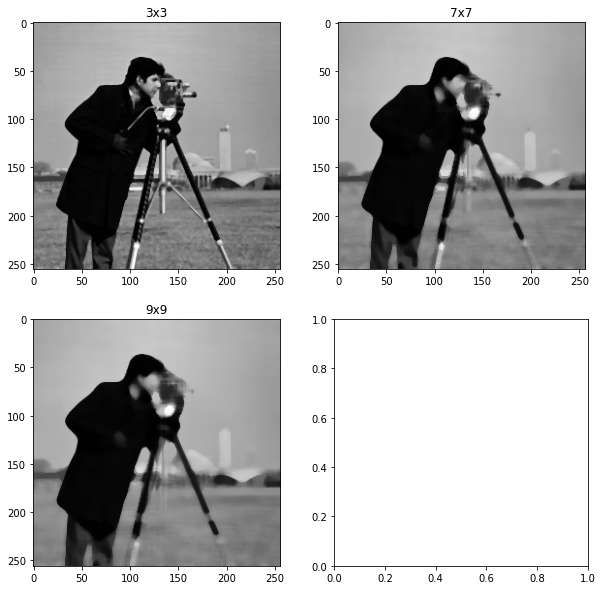

In [43]:
img1 = cv2.medianBlur(img,3)
img2 = cv2.medianBlur(img,7)
img3 = cv2.medianBlur(img,9)

f, axarr = plt.subplots(2,2, figsize=(10, 10))
axarr[0,0].set_title('3x3')
axarr[0,0].imshow(img1, cmap='gray')
axarr[0,1].set_title('7x7')
axarr[0,1].imshow(img2, cmap='gray')
axarr[1,0].set_title('9x9')
axarr[1,0].imshow(img3, cmap='gray')
plt.show()

> Se puede observar que la imágen con un filtro de media de 3x3 se ve casi igual a la imagen original, mientras que la imagen con un filtro de media de 9x9 pierde calidad y el salto entre un color y otro es más drástico.